<div style="font-size:30px; font-family:verdana; color:#159364">
Sentense Colorization EN and JP
</div>

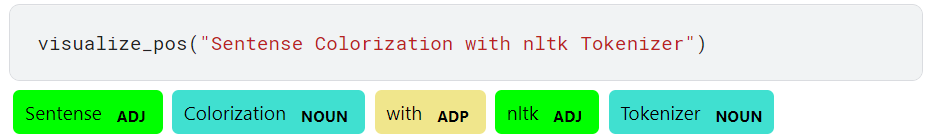

## References
- https://towardsdatascience.com/visualizing-part-of-speech-tags-with-nltk-and-spacy-42056fcd777e
- https://note.nkmk.me/python-janome-tutorial/

## Import libraries

In [1]:
!pip install spacy
!pip install janome
!pip install nltk

In [2]:
import pandas as pd
from spacy import displacy
# for english
import nltk
from nltk.tokenize import TreebankWordTokenizer as twt
# for japanese
from janome.tokenizer import Tokenizer

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mokom\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mokom\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\mokom\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

# Sentence colorization for EN with nltk

## Preparation: Tokenize and tag
<div style="font-size:15px; font-family:verdana;">
    <ol>
        <li><div style="color:#159364">nltk.word_tokenize</div>: tokenize a sentence</li>
        <li><div style="color:#159364">nltk.pos_tag</div>: get tags in a sentence</li>
    </ol>
</div>

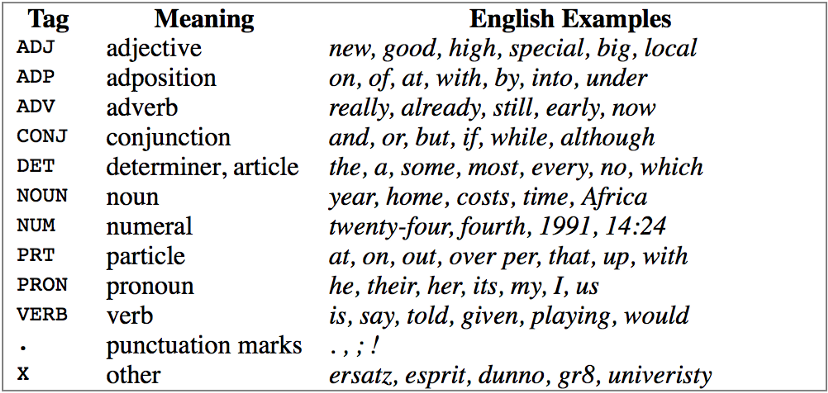
https://www.nltk.org/book/ch05.html

In [4]:
text = 'Sentense Colorization with nltk Tokenizer'
tokens = nltk.word_tokenize(text)
print(tokens)

['Sentense', 'Colorization', 'with', 'nltk', 'Tokenizer']


In [5]:
tags = nltk.pos_tag(tokens)
print(tags[:10])

[('Sentense', 'JJ'), ('Colorization', 'NN'), ('with', 'IN'), ('nltk', 'JJ'), ('Tokenizer', 'NNP')]


In [6]:
pos_tags = ["PRON", "VERB", "NOUN", "ADJ", "ADP", "ADV", "CONJ", "DET", "NUM", "PRT"]
colors = {"PRON": "blueviolet",
          "VERB": "lightpink",
          "NOUN": "turquoise",
          "ADJ" : "lime",
          "ADP" : "khaki",
          "ADV" : "orange",
          "CONJ" : "cornflowerblue",
          "DET" : "forestgreen",
          "NUM" : "salmon",
          "PRT" : "yellow"}
options = {"ents": pos_tags, "colors": colors}

In [7]:
def visualize_pos(text):
    # Tokenize text and pos tag each token
    tokens = twt().tokenize(text)
    tags = nltk.pos_tag(tokens, tagset = "universal")

    # Get start and end index (span) for each token
    span_generator = twt().span_tokenize(text)
    spans = [span for span in span_generator]

    # Create dictionary with start index, end index, 
    # pos_tag for each token
    ents = []
    for tag, span in zip(tags, spans):
        if tag[1] in pos_tags:
            ents.append({"start" : span[0], 
                         "end" : span[1], 
                         "label" : tag[1] })

    doc = {"text" : text, "ents" : ents}
    displacy.render(doc, 
                    style = "ent", 
                    options = options, 
                    manual = True,
                   )

In [8]:
visualize_pos("Sentense Colorization with nltk Tokenizer")

# Sentence colorization for JP with janome

In [9]:

tokenizer = Tokenizer()
text = '日本語の文章を形態素解析し、品詞を可視化します'
tokens = tokenizer.tokenize(text)
for token in tokens:
    print(token)

日本語	名詞,一般,*,*,*,*,日本語,ニホンゴ,ニホンゴ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
文章	名詞,一般,*,*,*,*,文章,ブンショウ,ブンショー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
形態素	名詞,一般,*,*,*,*,形態素,ケイタイソ,ケイタイソ
解析	名詞,サ変接続,*,*,*,*,解析,カイセキ,カイセキ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
、	記号,読点,*,*,*,*,、,、,、
品詞	名詞,一般,*,*,*,*,品詞,ヒンシ,ヒンシ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
可視	名詞,一般,*,*,*,*,可視,カシ,カシ
化	名詞,接尾,サ変接続,*,*,*,化,カ,カ
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
ます	助動詞,*,*,*,特殊・マス,基本形,ます,マス,マス


__token.part_of_speech__ can access morpheme

code: https://github.com/mocobeta/janome/blob/dc7ee378e3ae771d0ad4147c9f87c0feccee2210/janome/tokenizer.py

In [10]:
token.part_of_speech.split(',')[0]

'助動詞'

__token.surface__ can access raw text

In [11]:
token.surface

'ます'

In [12]:
def get_pos_tag(token):
    return token.part_of_speech.split(',')[0]

In [13]:
pos_tags = ["名詞", "動詞", "形容詞", "助詞", "助動詞", "接続詞", "接頭詞", "記号", "副詞", "その他"]
colors = {"形容詞": "blueviolet",
          "動詞": "lightpink",
          "助詞": "turquoise",
          "名詞" : "lime",
          "助動詞" : "khaki",
          "接続詞" : "orange",
          "接頭詞" : "cornflowerblue",
          "その他" : "forestgreen",
          "副詞" : "salmon",
          "記号" : "yellow"}
options = {"ents": pos_tags, "colors": colors}

In [14]:
def visualize_pos(text):
    # Tokenize text and pos tag each token
    tokens = tokenizer.tokenize(text)

    ents = []
    start_index = 0
    for token in tokens:
        ents.append({
            "start": start_index,
            "end": start_index + len(token.surface),
            "label": get_pos_tag(token)}
            )
        start_index += len(token.surface)

    doc = {"text" : text, "ents" : ents}
    displacy.render(doc, 
                    style = "ent", 
                    options = options, 
                    manual = True,
                   )

In [15]:
visualize_pos(text)